# Modelling infectious diseases

In this chapter we will look at a particular family of ODE systems
that describe the spread of infectious diseases. Athough the spread of infections
is a very complex physical and biological process, we shall see that it can be modeled
with fairly simple systems of ODEs, which we can solve using the tools from the
previous chapters.

# Derivation of the SIR model

In order to derive a model we need to make a number of simplifying assumptions. The
most important one is that we do not consider individuals, just populations. The
population is assumed to be perfectly mixed in a confined area, which means that we
do not consider spatial transport of the disease, just temporal evolution. The first
model we will derive is very simple, but we shall see that it can easily be extended to
models that are used world-wide by health authorities to predict the
spread of diseases such as Covid19, flu, ebola, HIV, etc.

In the first version of the model we will keep track of three categories of people:
 * **S**: susceptibles - who can get the disease

 * **I**: infected - who have developed the disease and can infect susceptibles

 * **R**: recovered - who have recovered and become immune

We represent these as mathematical quantities
$S(t)$, $I(t)$, $R(t)$,  which represent the number of people in each category.
The goal is now to derive a set of equations for $S(t)$, $I(t)$, $R(t)$, and then
solve these equations to predict the spread of the disease.

To derive the model equations,
consider the dynamics in a time interval $\Delta t$. During this time, a certain
number of infected people will meet and transfer the infection to susceptible people.
It is natural that such disease transmission is proportional to the product $SI$, since
in a mix of $S$ susceptibles and $I$ infected people, there are $SI$ possible
pairs containing one person in the $I$ category and one in $S$.
We now assume that over the time interval
$\Delta t$, a certain fraction of these possible $S$-$I$ encounters actually happen and
lead to disease transmission, and we introduce a constant $\beta$ to represent
this fraction. We can interpret $\beta$ as the probability that an infected person
meets and infects a susceptible person. Over the time interval $\Delta t$, we
then have $\Delta t\,\beta SI$ people who get infected and move from the $S$
to the $I$ category. With mathematics, we have
the loss in $S(t)$ from time $t$ to $t+\Delta t$ given by

$$
S(t+\Delta t) = S(t) - \Delta t\,\beta S(t)I(t)
$$

and a corresponding gain in $I(t)$:

$$
I(t+\Delta t) = I(t) + \Delta t\,\beta S(t)I(t)
$$

These two equations represent the key component of all the models considered
in this chapter. More advanced models are typically derived by adding more
categories and more transitions between them, but the individual transitions are
very similar to the ones presented here.

<!-- dom:FIGURE: [./fig-ode2/SIR0.png, width=800 frac=0.8] Graphical representation of the simplest SIR-model, where people move from being susceptible ($S$) to being infected ($I$) and then reach the recovered ($R$) category with immunity against the disease. -->
<!-- begin figure -->

<p>Graphical representation of the simplest SIR-model, where people move from being susceptible ($S$) to being infected ($I$) and then reach the recovered ($R$) category with immunity against the disease.</p>
<img src="./fig-ode2/SIR0.png" width=800>

<!-- end figure -->


We also need to model the transition of people from the $I$ to the $R$ catogory.
Again considering a small time interval $\Delta t$, it is natural to assume that
a fraction $\Delta t\,\nu$ of the infected recover and move to the $R$ category.
Here $\nu$ is a constant describing the time dynamics of the disease.
The increase in $R$ is given by

$$
R(t+\Delta t) = R(t) + \Delta t\,\nu I(t),
$$

and we also need to subtract the same term in the balance equation for $I$, since
the people move from $I$ to $R$. We get

$$
I(t+\Delta t) = I(t) + \Delta t\,\beta S(t)I(t) -\Delta t\,\nu I(t) .
$$

We now have three equations for $S$, $I$, and $R$:

<!-- Equation labels as ordinary links -->
<div id="SIR1:S"></div>

$$
\begin{equation}
S(t+\Delta t) = S(t) - \Delta t\,\beta S(t)I(t)
\label{SIR1:S} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="SIR1:I"></div>

$$
\begin{equation} 
I(t+\Delta t) = I(t) + \Delta t\,\beta S(t)I(t) -\Delta t\nu I(t)
\label{SIR1:I} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="SIR1:R"></div>

$$
\begin{equation} 
R(t+\Delta t) = R(t) + \Delta t\,\nu I(t)
\label{SIR1:R} \tag{3}
\end{equation}
$$

Although the notation is slightly different, we may recognize these equations
as a system of difference equations of the same kind that we solved in Chapter
1. We could easily solve the equations as such, using techniques from
Chapter 1, but models of this kind are more commonly formulated
as systems of ODEs, which can be solved with the tools we developed in Chapter 3.

To turn the difference equations into ODEs, we first divide all equations
by $\Delta t$ and rearrange, to get

<!-- Equation labels as ordinary links -->
<div id="sir_diffeq0"></div>

$$
\begin{equation}
\frac{S(t+\Delta t) - S(t)}{\Delta t} = - \beta S(t)I(t), \label{sir_diffeq0} \tag{4} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="sir_diffeq1"></div>

$$
\begin{equation} 
\frac{I(t+\Delta t) - I(t)}{\Delta t} = \beta t S(t)I(t) -\nu I(t), \label{sir_diffeq1} \tag{5} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="sir_diffeq2"></div>

$$
\begin{equation} 
\frac{R(t+\Delta t) - R(t)}{\Delta t} = \nu I(t) . \label{sir_diffeq2} \tag{6}
\end{equation}
$$

We see that by letting $\Delta t\rightarrow 0$, we get
derivatives on the left-hand side:

<!-- Equation labels as ordinary links -->
<div id="sir_ode0"></div>

$$
\begin{equation}
S'(t) = - \beta S I \label{sir_ode0} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="sir_ode1"></div>

$$
\begin{equation} 
I'(t) = \beta S I -\nu I  \label{sir_ode1} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="sir_ode2"></div>

$$
\begin{equation} 
R'(t) = \nu I \label{sir_ode2} \tag{9}
\end{equation}
$$

This is a system of three ODEs which we will solve for the unknown
functions $S(t)$, $I(t)$, $R(t)$. To solve the equations we need
to specify initial conditions $S(0)$ (many), $I(0)$ (few), and
$R(0)$ (=0?), as well as the parameters $\beta$ and $\nu$.
For practical applications of the model, estimating the parameters is
usually a major challenge. We can estimate
$\nu$ from the fact that $1/\nu$ is the average recovery time for the disease,
which is usually possible to determine from early cases.
The infection rate $\beta$, on the other hand, lumps a lot of biological and
sociological factors into a single number, and it is usually very difficult to estimate for a new disease.
It depends both the biology of the disease itself, essentially how infectious it is,
and on the interactions of the population. In a global pandemic the
behavior of the population varies between different countries, and it will typically
change with time, so $\beta$ must usually be adapted to different regions and different
phases of the disease.

Although the system ([7](#sir_ode0))-([9](#sir_ode2)) looks quite simple, it is
not possible to solve these equations analytically. For particular applications
it is common to make simplifications that allow analytical solutions. For instance,
when studying the early phase of an epidemic one is mostly interested in the $I$
category, and since the number of infected cases in this phase is low compared with
the entire population we may assume that $S$ is approximately constant. Setting $S$ to be
constant turns ([8](#sir_ode1)) into a simple equation describing exponential growth, with solution

<!-- Equation labels as ordinary links -->
<div id="sir_exp0"></div>

$$
\begin{equation}
I(t) = I_0 e^{(\beta S -\nu)} .
\label{sir_exp0} \tag{10} \end{equation}
$$

Such an approximate formula may be very useful, in particular for estimating the
parameters of the model. In the early phase of an epidemic the number of infected
people typically follows an exponential curve, and we can fit the parameters of the model
so that ([10](#sir_exp0)) fits the observed dynamics. However, if we want to describe the
full dynamics of the epidemic we need to solve the complete system of ODEs, and
in this case there are no analytical solutions available.

### Solving the SIR model with the `ODESystem` class hierarchy.

We could of course implement a numerical solution of the SIR equations directly, for
instance by applying the forward Euler method to ([7](#sir_ode0))-([9](#sir_ode2)), which
will simply give us back the original difference equations in
([4](#sir_diffeq0))-([6](#sir_diffeq2)). However, since the ODE solver
tools we developed in Chapter 3 are completely
general, they can easily be used to solve the SIR model. To solve the system using the
fourth-order RK method of the ODESolver hierarchy, the Python implementation
may look as follows:

In [1]:
%matplotlib inline

from ODESolver import RungeKutta4
import numpy as np
import matplotlib.pyplot as plt

def SIR_model(u,t):
    beta = 0.001
    nu = 1/7.0
    S, I, R = u[0], u[1], u[2]
    dS = -beta*S*I
    dI = beta*S*I - nu*I
    dR = nu*I
    return [dS,dI,dR]

S0 = 1000
I0 = 1
R0 = 0

solver= RungeKutta4(SIR_model)
solver.set_initial_condition([S0,I0,R0])
time_points = np.linspace(0, 100, 101)
u, t = solver.solve(time_points)
S = u[:,0];  I = u[:,1]; R = u[:,2]

plt.plot(t,S,t,I,t,R)
plt.show()

### A class implementation of the SIR model.

As noted above, estimating the parameters in the model is often challenging.
In fact, the most important application of models of this kind is to
predict the dynamics of new diseases, for instance the global Covid19 pandemic.
Accurate predictions of the number of disease cases can be extremely important
in planning the response to the epidemic, but the challenge is that for a new
disease all the parameters are largely unknown. Although there are ways to
estimate the parameters from the early disease dynamics, the estimates will contain
a large degree of uncertainty, and a common strategy is then to run the
model for multiple parameters to get an idea of what disease outbreak
scenarios to expect. We can easily run the code above for multiple values of
`beta` and `nu`, but it is inconvenient that both parameters are hardcoded as local
variables in the `SIR_model` function, so we need to edit the code for each new parameter value
we want. As we have seen earlier, it is much better to represent such a parameterized
function as a class, where the parameters can be set in the constructor and the
function itself is implemented in a `__call__` method. A class for the SIR model
could look like:

In [2]:
class SIR:
    def __init__(self, beta, nu):
        self.beta = beta
        self.nu = nu

    def __call__(self,u,t):
        S, I, R = u[0], u[1], u[2]
        dS = -self.beta*S*I
        dI = self.beta*S*I - self.nu*I
        dR = self.nu*I
        return [dS,dI,dR]

The use of the class is very similar to the use of the `SIR_model` function above.
We need to create an instance of the class with given values of `beta` and `nu`, and
then this instance can be passed to the ODE solver just as any regular Python function.

# Extending the SIR model

The SIR model itself is rarely used for predictive simulations of real-world diseases,
but various extensions of the model are used to a large extent. Many such extensions
have been derived, in order to best fit the dynamics of different infectious diseases.
We will here consider a few such extensions, which are all based on the building
blocks of the simple SIR model.

### A SIR model without life-long immunity.

One very simple modification of the model above is to remove the assumption of
life-long immunity. The model ([7](#sir_ode0))-([9](#sir_ode2)) describes a one-directional
flux towards the R category, and if we solve the model for a sufficiently
long time interval the entire population will end up in R. This situation is not
realistic for many diseases, since immunity is often lost or reduced with time.
In the model this loss can be described by a leakage of people from the R category back
to S. If we introduce the parameter $\gamma$ to describe this flux
($1/\gamma$ being the mean time for immunity), the modified equation system looks like

$$
\begin{align*}
S'(t) &= - \beta S I +\gamma R,\\
I'(t) &= \beta S I -\nu I,  \\
R'(t) &= \nu I -\gamma R.
\end{align*}
$$

As above, we see that the reduction in $R$ is matched by an increase in $S$ of
exactly the same magnitude. The total population $S+I+R$ remains constant.
The model can be implemented by a trivial extension of the `SIR` class shown above,
by simply adding one additional parameter to the constructor and the extra terms
in the `dS` and `dR` equations. Depending on the choice of the parameters, the model
may show far more interesting dynamics than the simplest SIR model.

<!-- dom:FIGURE: [./fig-ode2/SIR1.png, width=800 frac=0.8] Illustration of a SIR model without lifelong immunity, where people move from the R category back to S after a given time. -->
<!-- begin figure -->

<p>Illustration of a SIR model without lifelong immunity, where people move from the R category back to S after a given time.</p>
<img src="./fig-ode2/SIR1.png" width=800>

<!-- end figure -->


### A SEIR model to capture the incubation period.

For many important infections, there is a significant incubation period during
which individuals have been infected, but they are not yet infectious themselves. To
capture these dynamics in the model, we may add an
additional category E (for exposed). When people are infected they will then move
into the E category rather than directly to I, and then gradually move over
to the infected state where they can also infect others. The model for how susceptible
people get infected is kept exactly as in the ordinary SIR model. Such a SEIR model
is illustrated in [Figure](#fig:seir), and the ODEs may look like

$$
\begin{align*}
S'(t) &= - \beta S I +\gamma R,\\
E'(t) &= \beta S I - \mu E, \\
I'(t) &= \mu E -\nu I,  \\
R'(t) &= \nu I -\gamma R.
\end{align*}
$$

<!-- dom:FIGURE: [./fig-ode2/SEIR.png, width=800 frac=0.8] Illustration of the SEIR model, without life-long immunity.  <div id="fig:seir"></div> -->
<!-- begin figure -->
<div id="fig:seir"></div>

<p>Illustration of the SEIR model, without life-long immunity.</p>
<img src="./fig-ode2/SEIR.png" width=800>

<!-- end figure -->



Again, this small extension of the model does not make it much more
difficult to solve. The following code shows an example of how the SEIR model
can be implemented as a class and solved with the `ODESolver` hierarchy:

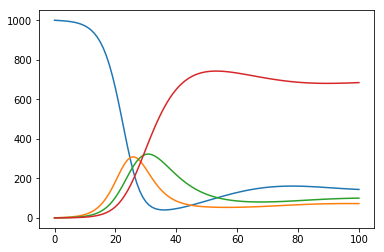

In [3]:
%matplotlib inline

from ODESolver import RungeKutta4
import numpy as np
import matplotlib.pyplot as plt

class SEIR:
    def __init__(self, beta, mu, nu, gamma):
        self.beta = beta
        self.mu = mu
        self.nu = nu
        self.gamma = gamma


    def __call__(self,u,t):
        S, E, I, R = u
        dS = -self.beta*S*I + self.gamma*R
        dE  = self.beta*S*I - self.mu*E
        dI =  self.mu*E - self.nu*I
        dR = self.nu*I - self.gamma*R
        return [dS,dE,dI,dR]



S0 = 1000
E0 = 0
I0 = 1
R0 = 0
model = SEIR(beta=0.001, mu=1.0/5,nu=1.0/7,gamma=1.0/50)

solver= RungeKutta4(model)
solver.set_initial_condition([S0,E0,I0,R0])
time_points = np.linspace(0, 100, 101)
u, t = solver.solve(time_points)
S = u[:,0]; E = u[:,1]; I = u[:,2]; R = u[:,3]

plt.plot(t,S,t,E,t,I,t,R)
plt.show()

# A model of the Covid19 pandemic
The models considered above can typically be adapted to describe more complex
disease behavior by adding more categories of people and possibly more interactions
between the different categories. We will now consider an extension of the
SEIR model above into a model that has been used by Norwegian health authorities
to predict the spread of the 2020 Covid19 pandemic. We will here derive the model
as a system of ODEs, just like the models considered above, while the real
model that is used to provide Covid19 predictions for health authorities is a stochastic model.
A stochastic model is somewhat more flexible than the deterministic ODE version,
and can more easily incorporate dynamics such as model parameters that vary with
time after infection. For instance, the infectiousness ($\beta$) should typically
follow a bell-shaped curve that increases gradually after infection, reaches a peak after
a few days, and is then reduced. Such behavior is easier to incorporate in a stochastic
model than in the deterministic ODE model considered here, which
essentially assumes a constant $\beta$ for everyone in the $I$ category. However,
the overall structure and dynamics of the two model types are exactly the same, and
for certain choices of the model parameters the stochastic and deterministic
models become equivalent.


To describe Covid19, the SEIR model introduced above is modified to incorporate
two important disease characteristics:
 * A certain number of people infected with Covid19 have no symptoms. These asymptomatic
   people can still infect other, but with a lower infectiousness than the symptomatic group, and
   they need to be treated as a separate category.

 * A large number of infections occur before the infector experiences symptoms, which suggests
   an additional *exposed* category where people are infectious but do not yet experience
   symptoms.

These characteristics can be modeled by adding more categories to the SEIR model introduced
earlier. We include two exposed categories $E_1$ and $E_2$, with the first being non-infectious and
the second being able to infect others. The I category is also divided in two; a symptomatic $I$
and an asymptomatic $I_a$. The flux from $S$ to $E_1$ will be similar to the SEIR model, but from $E_1$
people will follow one of two possible trajectories. Some will move on to $E_2$ and then
into $I$ and finally $R$, while others move directly into $I_a$ and then to $R$.
The model is illustrated in [Figure](#fig:covid19).

<!-- dom:FIGURE: [./fig-ode2/SEEIIR.png, width=800 frac=0.8] Illustration of the Covid19 epidemic model, with two alternative disease trajectories. <div id="fig:covid19"></div> -->
<!-- begin figure -->
<div id="fig:covid19"></div>

<p>Illustration of the Covid19 epidemic model, with two alternative disease trajectories.</p>
<img src="./fig-ode2/SEEIIR.png" width=800>

<!-- end figure -->


The derivation of the model equations is similar to the simpler models
considered above, but there will be more equations as well as more terms in each equation.
The most important extension from the models above is that the SEEIIR model has
three categories of infectious people; $E_2, I$, and $I_a$. All of these
interact with the $S$ category to create new infections, and we model each
of these interactions exactly as we did above. In a time
interval $\Delta t$, we have the following three contributions to the flux from
$S$ to $E_1$:
* Infected by people in $I$: $\beta S I \Delta t$.

* Infected by people in $I_a$: $r_{ia} \beta S I_a \Delta t$

* Infected by people in $E_2$: $r_{e2} \beta S E_2 \Delta t$

We allow the infectiousness to be different between the three categories,
incorporated through a main infectiousness parameter $\beta$ and
two parameters $r_{ia}, r_{e2}$ that scale the infectiousness for the two respective groups.
Considering all three contributions, and following the same steps as above
to construct a difference equation and then a ODE, we get the following equation
for the $S$ category:

<!-- Equation labels as ordinary links -->
<div id="eq:1"></div>

$$
\begin{equation} \label{eq:1} \tag{11}
\frac{dS}{dt} = - \beta SI- r_{ia} \beta S I_a - r_{e2} \beta S E_2.
\end{equation}
$$

When people get infected they move from $S$ to $E_1$, so the same three terms
must appear in the equation for $E_1$, with opposite signs. Furthermore,
people in $E_1$ will move either to $E_2$ or $I_a$. We have

$$
\begin{align*}
    \frac{dE_1}{dt} & = \beta S I + r_{ia} \beta S I_a + r_{e2} \beta S E_2 - \lambda_1(1-p_a)E_1 - \lambda_1 p_a E_1 \nonumber \\
    & = \alpha S I + r_{ia} \beta S I_a + r_{e2} \beta S E_2- \lambda_1 E_1.
\end{align*}
$$

Here, $p_a$ is a parameter describing the proportion of infected people that never develop symptoms, while
$1/\lambda_1$ is the mean duration of the non-infectious incubation period. The term $\lambda_1(1-p_a)E_1$
represents people moving to $E_2$, and $\lambda_1p_aE_1$ are people moving to $I_a$.
In the equation for
$E_1$ we can combine these two fluxes into a single term, but they must be considered
separately in the equations for $E_2$ and $I_a$.

The $E_2$ category will get an influx of people from $E_1$, and an outflux of people moving on to
the infected $I$ category, while $I$ gets an influx from $E_2$ and an outflux to $R$. The ODEs for
these two categories become

$$
\begin{align*}
    \frac{dE_2}{dt} &= \lambda_1(1-p_a)E_1 - \lambda_2E_2, \\
    \frac{dI}{t} &= \lambda_2E_2 - \mu I,
\end{align*}
$$

where $1/\lambda_2$ and $1/\mu$ are the mean durations of the $E_2$ and $I$ phases, respectively.

The model for the asymptomatic disease trajectory is somewhat simpler, with $I_a$ receiving an
influx from $E_1$ and losing people directly to $R$. We have

$$
\frac{I_a}{dt} = \lambda_1  p_a E_1 - \mu I_a,
$$

where we have assumed that the duration of the $I_a$ period is the same as for $I$, i.e. $1/\mu$.
Finally, the dynamics of the recovered category are governed by

$$
\frac{dR}{dt} = \mu I + \mu I_a.
$$

Notice that we do not consider flow from the $R$ category back to $S$, so
we have effectively assumed life-long immunity. This assumption is probably not correct
for Covid19, but since the duration of immunity is still largely unknown, and
we are mostly interested in the early epidemic spread, we neglect the loss of immunity.

To summarize, the complete ODE system of the SEEIIR model can be written as

$$
\begin{align*}
S'(t) &= - \beta SI- r_{ia} \beta S I_a - r_{e2} \beta S E_2, \\
E_1'(t) &= \beta S I + r_{ia} \beta S I_a + r_{e2} \beta S E_2- \lambda_1 E_1, \\
E_2'(t) &= \lambda_1(1-p_a)E_1 - \lambda_2E_2, \\
I'(t) &= \lambda_2E_2 - \mu I, \\
I_a'(t) &= \lambda_1  p_a E_1 - \mu I_a, \\
R'(t) &= \mu (I + I_a).
\end{align*}
$$

A suitable choice of default parameters  for the model can be as follows:
<table border="1">
<thead>
<tr><th align="left"> Parameter </th> <th align="left">       Value       </th> </tr>
</thead>
<tbody>
<tr><td align="left">   $\beta$        </td> <td align="right">   $6.0 \cdot 10^{-6}$    </td> </tr>
<tr><td align="left">   $r_{ia}$       </td> <td align="right">   0.1                    </td> </tr>
<tr><td align="left">   $r_{e2}$       </td> <td align="right">   1.25                   </td> </tr>
<tr><td align="left">   $\lambda_1$    </td> <td align="right">   0.33                   </td> </tr>
<tr><td align="left">   $\lambda_2$    </td> <td align="right">   0.5                    </td> </tr>
<tr><td align="left">   $p_a$          </td> <td align="right">   0.4                    </td> </tr>
<tr><td align="left">   $\mu$          </td> <td align="right">   0.2                    </td> </tr>
</tbody>
</table>
These parameters are based on the early phase of the Covid19 outbreak and
can  tell us quite a bit about the disease dynamics. The
parameters $\mu, \lambda_1$, and $\lambda_2$ are given in units of days$^{-1}$,
so the mean duration of the symptomatic disease period is five days ($1/\mu$),
the non-infectious incubation period lasts three days on average, while the
mean duration of the infectious incubation period ($E_2$) is two days. Furthermore,
we see that the mean infectiousness of asymptomatic people is 10\% of
the infectiousness of the symptomatic cases. However, the infectiousness of the
$E_2$ category is 25\% higher than the infectiousness of the $I$ category. This
increased infectiousness is most likely the result of the $E_2$ category being
asymptomatic, so these people will move around a lot more than the symptomatic $I$
category. The $I_a$ group is also, of course, asymptomatic and therefore likely to
move around more, but it is assumed that these people have a very low virus count and
are therefore less infectious than the people that develop symptoms.

A function implementation of the SEEIIR model can look as follows

In [31]:
def SEEIIR_model(u,t):
    beta = 1.0; r_ia = 0.1; r_e2=1.25;
    lmbda_1=0.33; lmbda_2=0.5; p_a=0.4; mu=0.2;

    S, E1, E2, I, Ia, R = u

    dS  = -beta*S*I - r_ia*beta*S*Ia - r_e2*beta*S*E2
    dE1 = beta*S*I + r_ia*beta*S*Ia + r_e2*beta*S*E2 - lmbda_1*E1
    dE2 = lmbda_1*(1-p_a)*E1 - lmbda_2*E2
    dI  = lmbda_2*E2 - mu*I
    dIa = lmbda_1*p_a*E1 - mu*Ia
    dR  = mu*(I + Ia)
    return [dS, dE1, dE2, dI, dIa, dR]

Just as the simpler models, the SEEIIR model can be solved with
methods in the `ODEsolver` class hierarchy:

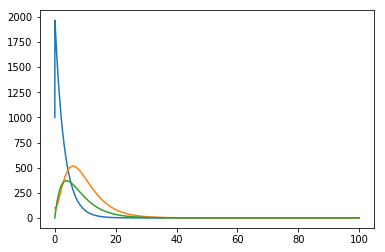

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from ODESolver import *

S_0 = 5e6
E1_0 = 1000
E2_0 = 0
I_0 = 100
Ia_0 = 0
R_0 = 0
U0 = [S0, E1_0, E2_0, I_0, Ia_0, R_0]

#model = SEEIIR(beta=0.001, mu=1.0/5,nu=1.0/7,gamma=1.0/50)

solver = RungeKutta4(SEEIIR_model)
solver.set_initial_condition(U0)
time_points = np.linspace(0, 100, 100001)
u, t = solver.solve(time_points)
S = u[:,0]; E1 = u[:,1]; E2 = u[:,2];
I = u[:,3]; Ia = u[:,4]; R = u[:,5]

plt.plot(t,E1, t,I,t,Ia)
plt.show()